# Coffee Sales Analysis

# Exploration snd Cleaning

In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df= pd.read_csv('/kaggle/input/coffee-shop-sales-analysis/Project.csv')
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [55]:
df.tail()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
149111,129465,14-06-2023,08:34:10,5,Lower Manhattan,41,4,4.25,17.0,Coffee,Barista Espresso,Cappuccino,Large,June,Wednesday,8,6,2
149112,133523,17-06-2023,09:55:47,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,9,6,5
149113,133674,17-06-2023,10:41:11,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,10,6,5
149114,133744,17-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Saturday,11,6,5
149115,149043,30-06-2023,11:18:31,8,Hell's Kitchen,8,8,45.00,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,June,Friday,11,6,4


In [56]:
df.columns

Index(['transaction_id', 'transaction_date', 'transaction_time', 'store_id',
       'store_location', 'product_id', 'transaction_qty', 'unit_price',
       'Total_Bill', 'product_category', 'product_type', 'product_detail',
       'Size', 'Month Name', 'Day Name', 'Hour', 'Month', 'Day of Week'],
      dtype='object')

In [57]:
df.shape

(149116, 18)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

In [59]:
df.duplicated().sum()

0

In [60]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
Day Name            0
Hour                0
Month               0
Day of Week         0
dtype: int64

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,149116.0,74737.371872,43153.600016,1.0,37335.75,74727.50,112094.25,149456.0
store_id,149116.0,5.342063,2.074241,3.0,3.00,5.00,8.00,8.0
product_id,149116.0,47.918607,17.930020,1.0,33.00,47.00,60.00,87.0
transaction_qty,149116.0,1.438276,0.542509,1.0,1.00,1.00,2.00,8.0
unit_price,149116.0,3.382219,2.658723,0.8,2.50,3.00,3.75,45.0
Total_Bill,149116.0,4.686367,4.227099,0.8,3.00,3.75,6.00,360.0
Hour,149116.0,11.735790,3.764662,6.0,9.00,11.00,15.00,20.0
Month,149116.0,3.988881,1.673091,1.0,3.00,4.00,5.00,6.0
Day of Week,149116.0,2.982336,1.996650,0.0,1.00,3.00,5.00,6.0


In [62]:
df.describe(include=object).T

,count,unique,top,freq
transaction_date,149116,181,19-06-2023,1343
transaction_time,149116,25762,09:31:15,41
store_location,149116,3,Hell's Kitchen,50735
product_category,149116,9,Coffee,58416
product_type,149116,29,Brewed Chai tea,17183
product_detail,149116,45,Our Old Time Diner Blend,8660
Size,149116,4,Regular,45789
Month Name,149116,6,June,35352
Day Name,149116,7,Friday,21701


In [63]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
store_id              int64
store_location       object
product_id            int64
transaction_qty       int64
unit_price          float64
Total_Bill          float64
product_category     object
product_type         object
product_detail       object
Size                 object
Month Name           object
Day Name             object
Hour                  int64
Month                 int64
Day of Week           int64
dtype: object

In [64]:
df2 = df.copy()
df2.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [65]:
df2.drop(columns=['transaction_time', 'Month', 'Day of Week'], inplace=True)

In [66]:
df2.columns

Index(['transaction_id', 'transaction_date', 'store_id', 'store_location',
       'product_id', 'transaction_qty', 'unit_price', 'Total_Bill',
       'product_category', 'product_type', 'product_detail', 'Size',
       'Month Name', 'Day Name', 'Hour'],
      dtype='object')

In [67]:
df2.dtypes

transaction_id        int64
transaction_date     object
store_id              int64
store_location       object
product_id            int64
transaction_qty       int64
unit_price          float64
Total_Bill          float64
product_category     object
product_type         object
product_detail       object
Size                 object
Month Name           object
Day Name             object
Hour                  int64
dtype: object

In [68]:
df2['transaction_date'] = pd.to_datetime(df2['transaction_date'], format='%d-%m-%Y')

In [69]:
df2.head()

,transaction_id,transaction_date,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour
0,114301,2023-06-01,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11
1,115405,2023-06-02,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11
2,115478,2023-06-02,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12
3,116288,2023-06-02,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19
4,116714,2023-06-03,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12


In [70]:
df.shape

(149116, 18)

In [71]:
# There is only 3 stores 
df['store_id'].value_counts()

store_id
8    50735
3    50599
5    47782
Name: count, dtype: int64

In [72]:
df['store_location'].value_counts()

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

In [73]:
df['product_category'].unique().tolist()

['Tea',
 'Coffee',
 'Bakery',
 'Drinking Chocolate',
 'Flavours',
 'Loose Tea',
 'Packaged Chocolate',
 'Branded',
 'Coffee beans']

In [74]:
df['product_type'].unique().tolist()

['Brewed herbal tea',
 'Brewed Black tea',
 'Brewed Green tea',
 'Brewed Chai tea',
 'Drip coffee',
 'Organic brewed coffee',
 'Barista Espresso',
 'Gourmet brewed coffee',
 'Scone',
 'Pastry',
 'Premium brewed coffee',
 'Hot chocolate',
 'Biscotti',
 'Sugar free syrup',
 'Regular syrup',
 'Herbal tea',
 'Black tea',
 'Chai tea',
 'Green tea',
 'Drinking Chocolate',
 'Organic Chocolate',
 'Clothing',
 'Housewares',
 'Espresso Beans',
 'Green beans',
 'Organic Beans',
 'Premium Beans',
 'Gourmet Beans',
 'House blend Beans']

In [75]:
df['product_detail'].unique().tolist()

['Peppermint',
 'Lemon Grass',
 'Earl Grey',
 'English Breakfast',
 'Serenity Green Tea',
 'Traditional Blend Chai',
 'Our Old Time Diner Blend',
 'Brazilian',
 'Espresso shot',
 'Ouro Brasileiro shot',
 'Columbian Medium Roast',
 'Ethiopia',
 'Oatmeal Scone',
 'Morning Sunrise Chai',
 'Almond Croissant',
 'Chocolate Croissant',
 'Jumbo Savory Scone',
 'Jamaican Coffee River',
 'Cappuccino',
 'Latte',
 'Sustainably Grown Organic',
 'Dark chocolate',
 'Croissant',
 'Ginger Biscotti',
 'Chocolate Chip Biscotti',
 'Hazelnut Biscotti',
 'Ginger Scone',
 'Cranberry Scone',
 'Scottish Cream Scone',
 'Sugar Free Vanilla syrup',
 'Hazelnut syrup',
 'Chocolate syrup',
 'Carmel syrup',
 'Spicy Eye Opener Chai',
 'Chili Mayan',
 'I Need My Bean! T-shirt',
 'I Need My Bean! Diner mug',
 'I Need My Bean! Latte cup',
 'Espresso Roast',
 'Primo Espresso Roast',
 'Guatemalan Sustainably Grown',
 'Organic Decaf Blend',
 'Civet Cat',
 'Jamacian Coffee River',
 'Brazilian - Organic']

In [76]:
df['Size'].unique().tolist()

['Large', 'Regular', 'Not Defined', 'Small']

# Insights/Objectives and Visualization

In [77]:
# 1) Which month has highest average sales?
monthly_sales = df2.groupby('Month Name')['Total_Bill'].sum().sort_values(ascending=False)
monthly_sales

Month Name
June        166485.88
May         156727.76
April       118941.08
March        98834.68
January      81677.74
February     76145.19
Name: Total_Bill, dtype: float64

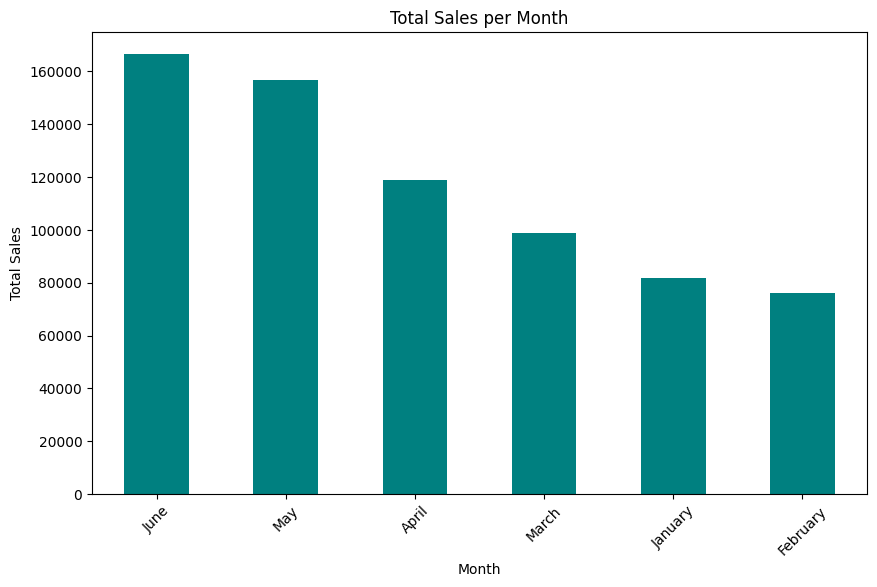

In [78]:
# monthly sales 
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='teal')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [79]:
# 2) Which week day has most sales?
daily_sales = df2.groupby('Day Name')['Total_Bill'].sum().sort_values(ascending=False)
daily_sales

Day Name
Monday       101677.28
Friday       101373.00
Thursday     100767.78
Wednesday    100313.54
Tuesday       99455.94
Sunday        98330.31
Saturday      96894.48
Name: Total_Bill, dtype: float64

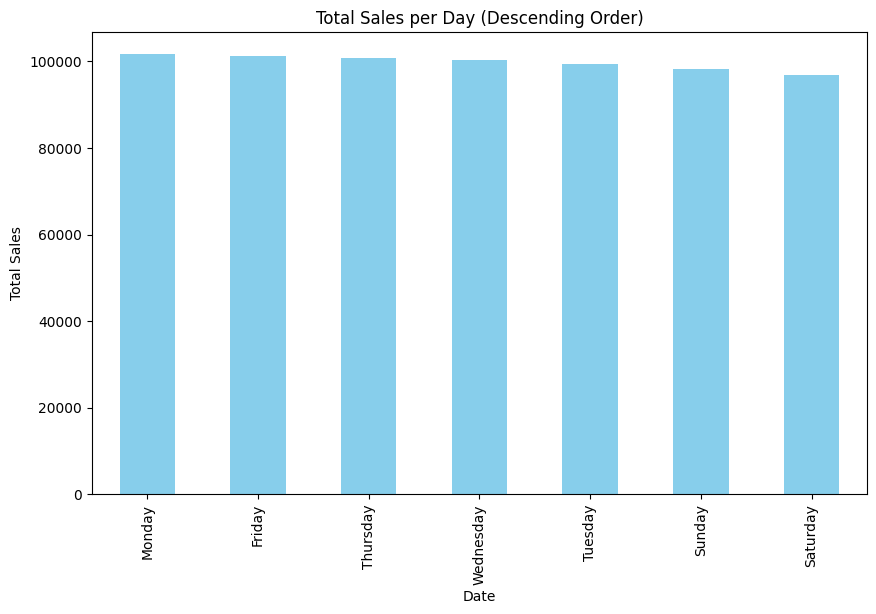

In [80]:
#daily sales
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales per Day (Descending Order)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


In [81]:
# 3) Which store and location has most sales?
location_sales = df2.groupby(['store_id', 'store_location'])['Total_Bill'].sum().sort_values(ascending=False)
location_sales

store_id  store_location 
8         Hell's Kitchen     236511.17
3         Astoria            232243.91
5         Lower Manhattan    230057.25
Name: Total_Bill, dtype: float64

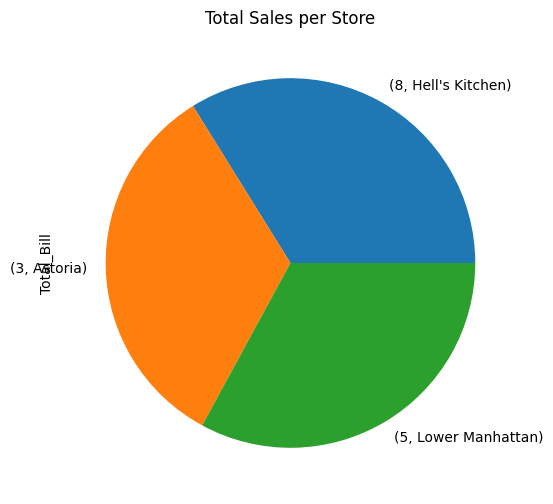

In [82]:
# sales by store
plt.figure(figsize=(10, 6))
location_sales.plot(kind='pie')
plt.title('Total Sales per Store')
plt.show()

In [83]:
# 4) What are the top 10 ordered products?
top_products_qty = df2.groupby('product_detail')['transaction_qty'].sum().sort_values(ascending=False)[0:10]
top_products_qty

product_detail
Ethiopia                     13271
Our Old Time Diner Blend     13074
Columbian Medium Roast       13068
Brazilian                    13012
Jamaican Coffee River        12431
Morning Sunrise Chai          9157
Latte                         9099
Earl Grey                     9095
Peppermint                    9067
Sustainably Grown Organic     9003
Name: transaction_qty, dtype: int64

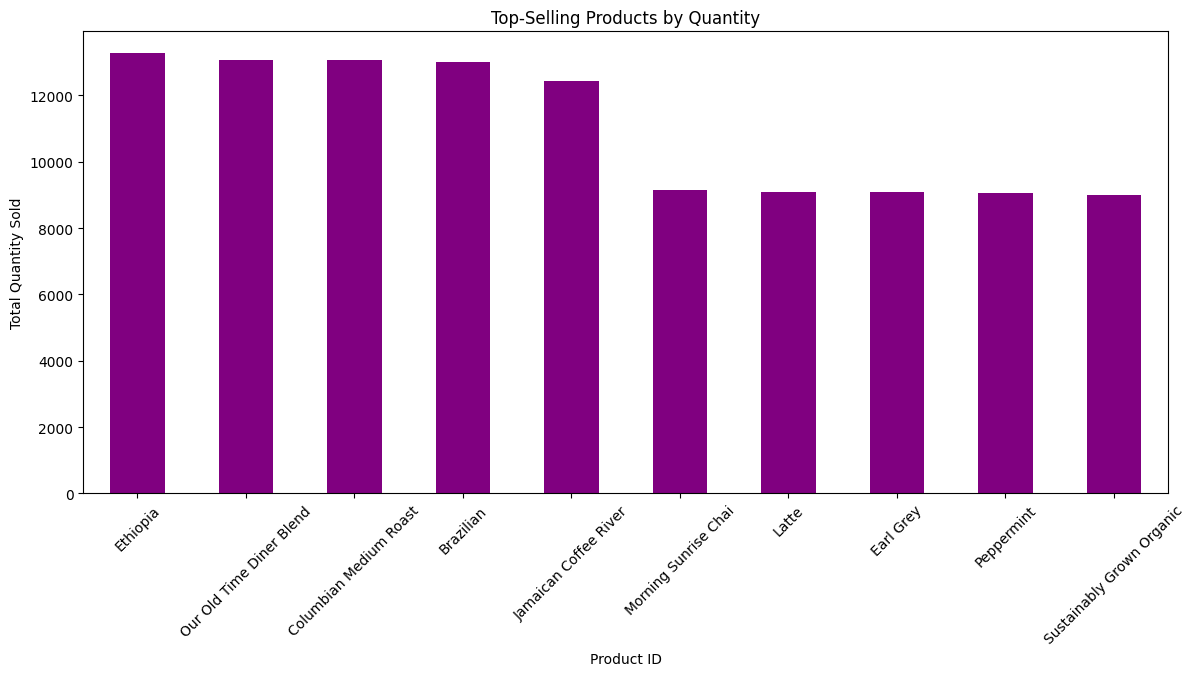

In [84]:
# top-selling products by quantity in descending order
plt.figure(figsize=(14, 6))
top_products_qty.plot(kind='bar', color='purple')
plt.title('Top-Selling Products by Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [85]:
# 5) What are the top 10 profitable products?
top_products_sales = df2.groupby('product_detail')['Total_Bill'].sum().sort_values(ascending=False)[0:10]
top_products_sales

product_detail
Ethiopia                     42304.10
Sustainably Grown Organic    39065.10
Jamaican Coffee River        38781.15
Brazilian                    37746.50
Latte                        36369.75
Dark chocolate               35785.70
Our Old Time Diner Blend     35278.00
Columbian Medium Roast       34528.50
Cappuccino                   33639.25
Morning Sunrise Chai         30587.50
Name: Total_Bill, dtype: float64

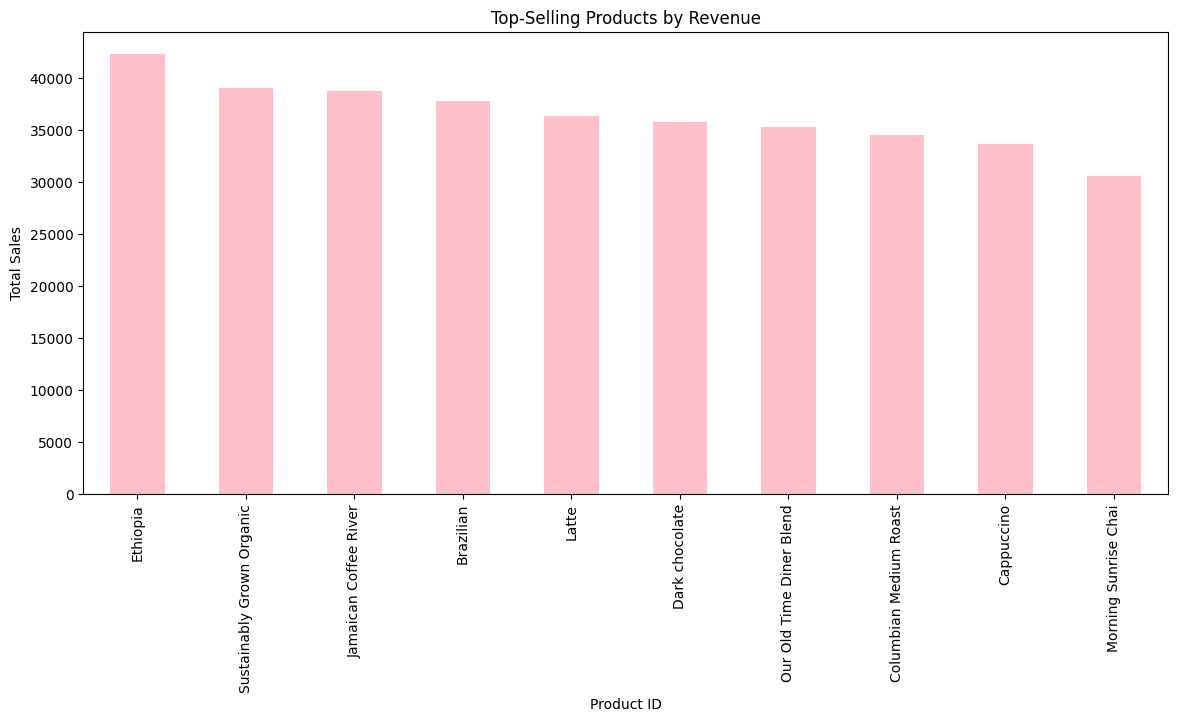

In [86]:
# top-selling products by revenue
plt.figure(figsize=(14, 6))
top_products_sales.plot(kind='bar', color='pink')
plt.title('Top-Selling Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

In [87]:
# 6) What is the top 5 most profitable categories?
category_sales = df2.groupby('product_category')['Total_Bill'].sum().sort_values(ascending=False)[0:5]
category_sales

product_category
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Name: Total_Bill, dtype: float64

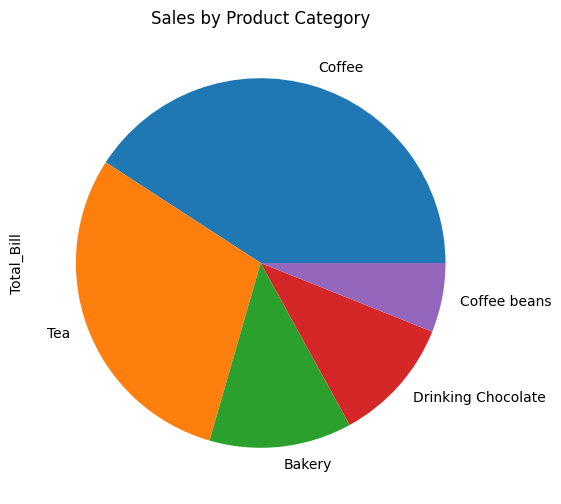

In [88]:
# category sales
plt.figure(figsize=(10, 6))
category_sales.plot(kind='pie')
plt.title('Sales by Product Category')
plt.xticks(rotation=45)
plt.show()


In [89]:
# 7) What is the most ordered size by location?
size_ordered_loc= df2.groupby(['store_location', 'Size'])['Total_Bill'].sum()
size_ordered_loc

store_location   Size       
Astoria          Large          82927.40
                 Not Defined    63772.96
                 Regular        69433.20
                 Small          16110.35
Hell's Kitchen   Large          78569.00
                 Not Defined    77542.42
                 Regular        65183.40
                 Small          15216.35
Lower Manhattan  Large          76461.75
                 Not Defined    73374.75
                 Regular        65144.75
                 Small          15076.00
Name: Total_Bill, dtype: float64

<Figure size 1200x600 with 0 Axes>

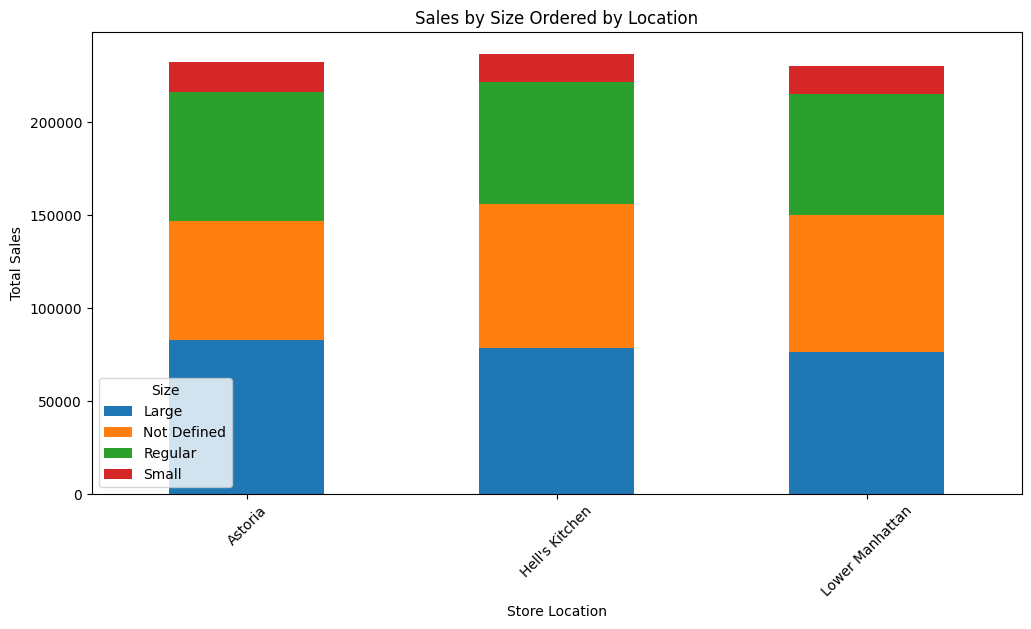

In [90]:
# sales by size and store location
plt.figure(figsize=(12, 6))
size_ordered_loc.unstack().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sales by Size Ordered by Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Size')
plt.show()

In [91]:
#Sales and categories by product size
sales_by_size = df.groupby(['product_category','Size'])['Total_Bill'].sum().reset_index()

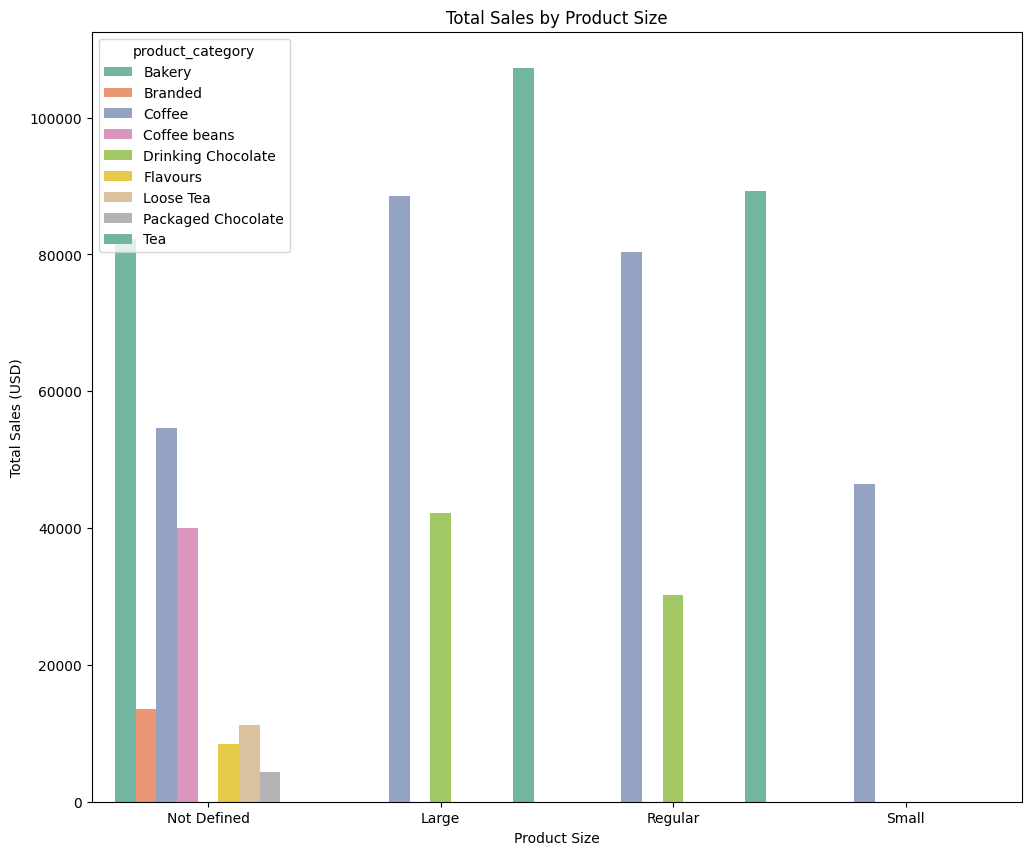

In [92]:
plt.figure(figsize=(12,10))
sns.barplot(x='Size', y='Total_Bill', data=sales_by_size, palette='Set2', hue='product_category')
plt.title('Total Sales by Product Size')
plt.xlabel('Product Size')
plt.ylabel('Total Sales (USD)')
plt.show()

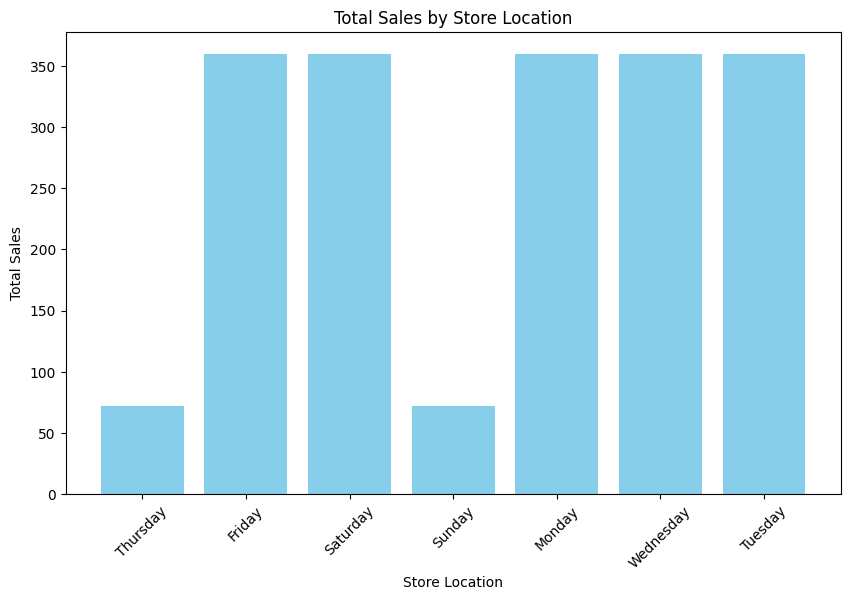

In [93]:
# Day that has most transactions
plt.figure(figsize=(10,6))
plt.bar(df2['Day Name'], df2['Total_Bill'], color='skyblue')
plt.title('Total Sales by Store Location')
plt.xlabel('Store Location')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [94]:
#top category sales by month
monthly_sales_cat = df.groupby(['Month Name', 'product_category'])['Total_Bill'].sum().reset_index()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

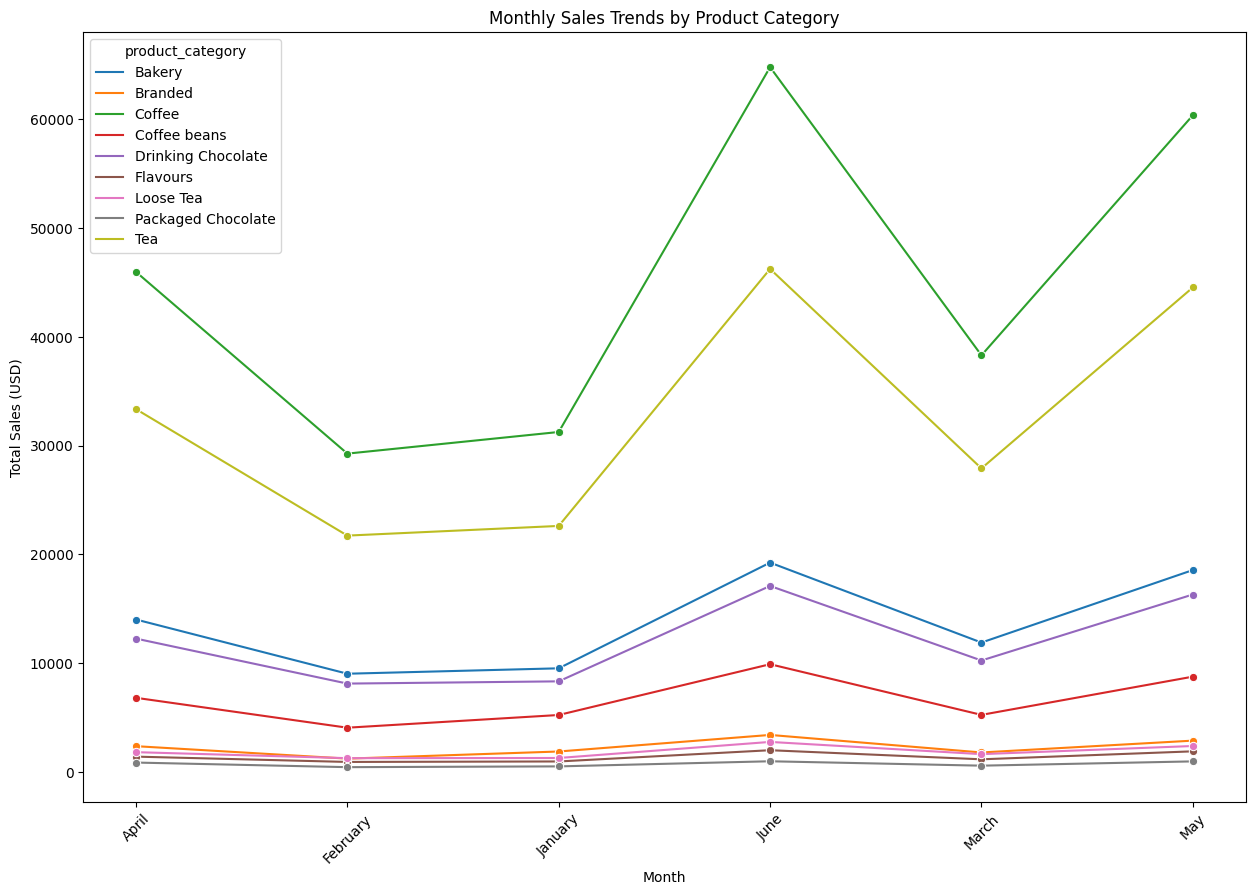

In [95]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Month Name', y='Total_Bill', hue='product_category', data=monthly_sales_cat, marker='o', palette='tab10')
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

In [96]:
# when is the rush hour?
sales_by_hours = df.groupby(['Day Name','Hour'])['Total_Bill'].sum().reset_index().sort_values(by='Total_Bill', ascending=False)
sales_by_hours

,Day Name,Hour,Total_Bill
78,Tuesday,9,13588.47
79,Tuesday,10,13497.68
4,Friday,10,13155.66
77,Tuesday,8,12950.19
3,Friday,9,12750.00
...,...,...,...
104,Wednesday,20,430.83
14,Friday,20,387.53
59,Sunday,20,383.88
29,Monday,20,330.40


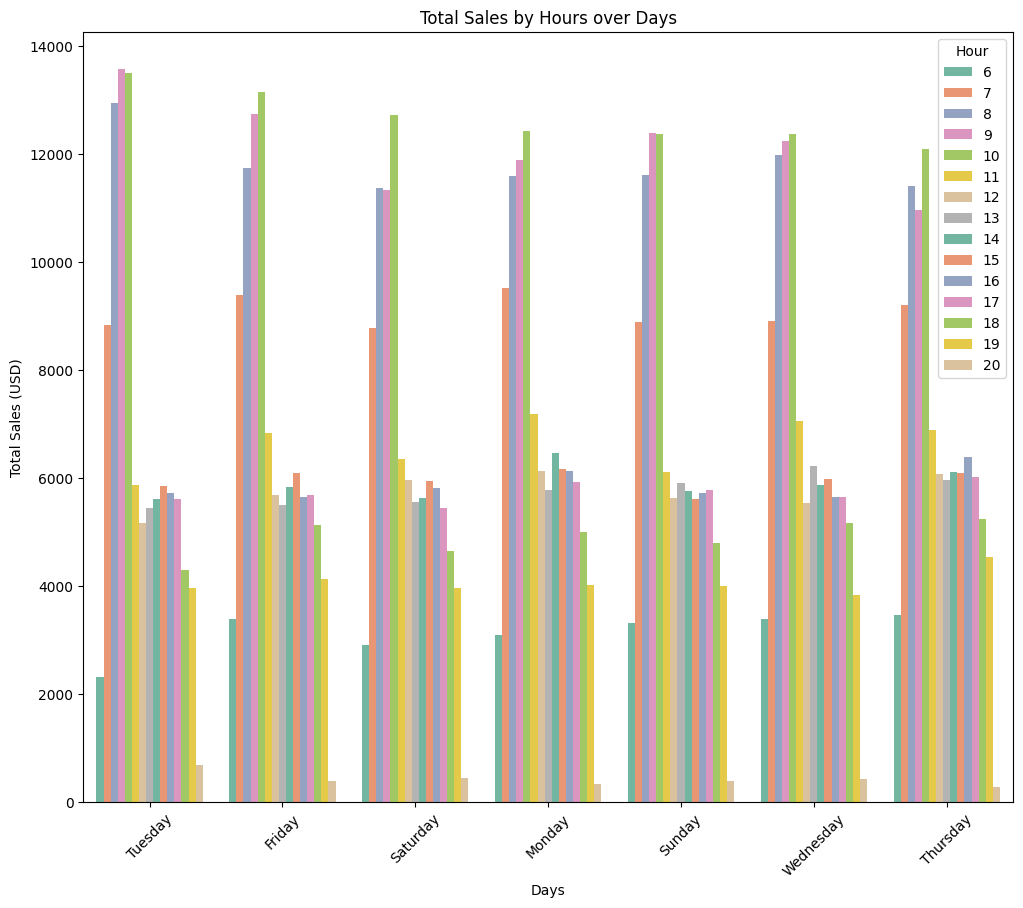

In [97]:
plt.figure(figsize=(12,10))
sns.barplot(x='Day Name', y='Total_Bill', data=sales_by_hours, palette='Set2', hue='Hour')
plt.title('Total Sales by Hours over Days')
plt.xlabel('Days')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()